In [5]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns

In [6]:
#loading the data for eda 
customers_df = pd.read_csv('Customers.csv')
transactions_df = pd.read_csv('Transactions.csv')
products_df = pd.read_csv('Products.csv')

In [7]:
#checking whether there is any missing values
print(customers_df.isnull().sum())
print(transactions_df.isnull().sum())
print(products_df.isnull().sum())

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64


In [8]:
#getting the necessary statistics
print(customers_df.describe())
print(transactions_df.describe())
print(products_df.describe())

       CustomerID      CustomerName         Region  SignupDate
count         200               200            200         200
unique        200               200              4         179
top         C0001  Lawrence Carroll  South America  2024-11-11
freq            1                 1             59           3
          Quantity   TotalValue       Price
count  1000.000000  1000.000000  1000.00000
mean      2.537000   689.995560   272.55407
std       1.117981   493.144478   140.73639
min       1.000000    16.080000    16.08000
25%       2.000000   295.295000   147.95000
50%       3.000000   588.880000   299.93000
75%       4.000000  1011.660000   404.40000
max       4.000000  1991.040000   497.76000
            Price
count  100.000000
mean   267.551700
std    143.219383
min     16.080000
25%    147.767500
50%    292.875000
75%    397.090000
max    497.760000


In [9]:
#checking datatypes of each column
print(customers_df.info())
print(transactions_df.info())
print(products_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB
None
<class 'pand

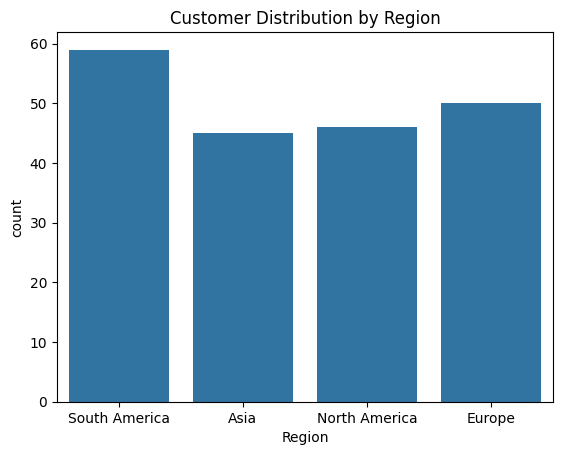

In [10]:
#customer analysis - region distribution
sns.countplot(x='Region', data=customers_df)
plt.title('Customer Distribution by Region')
plt.show()

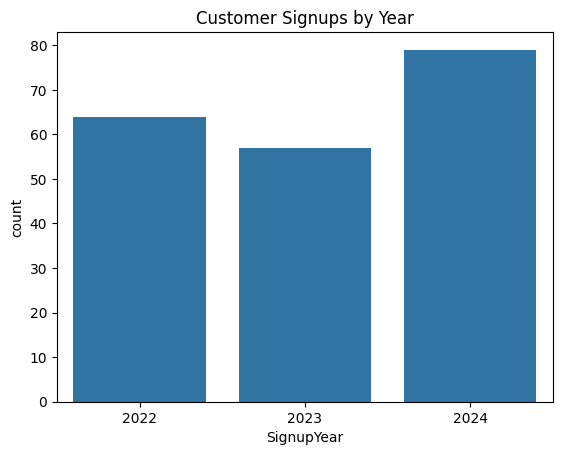

In [11]:
#sign-up trends / year
customers_df['SignupDate'] = pd.to_datetime(customers_df['SignupDate'])
customers_df['SignupYear'] = customers_df['SignupDate'].dt.year
sns.countplot(x='SignupYear', data=customers_df)
plt.title('Customer Signups by Year')
plt.show()

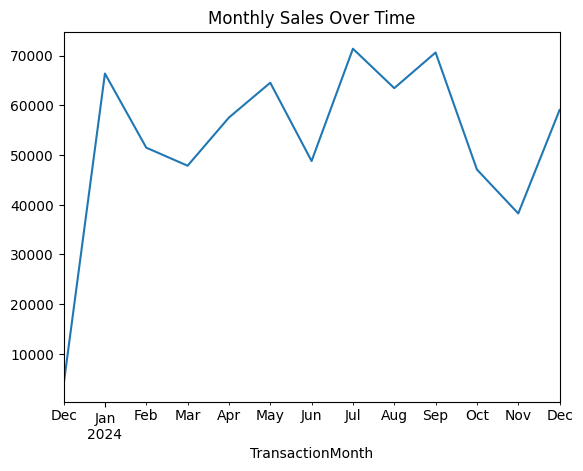

In [12]:
# Transaction Analysis - monthly sales over time
transactions_df['TransactionDate'] = pd.to_datetime(transactions_df['TransactionDate'])
transactions_df['TransactionMonth'] = transactions_df['TransactionDate'].dt.to_period('M')
monthly_sales = transactions_df.groupby('TransactionMonth')['TotalValue'].sum()
monthly_sales.plot(kind='line')
plt.title('Monthly Sales Over Time')
plt.show()

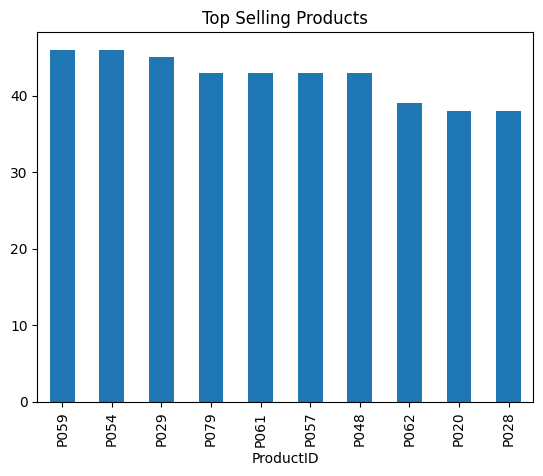

In [13]:
#Top-Selling Products
top_products = transactions_df.groupby('ProductID')['Quantity'].sum().sort_values(ascending=False).head(10)
top_products.plot(kind='bar')
plt.title('Top Selling Products')
plt.show()

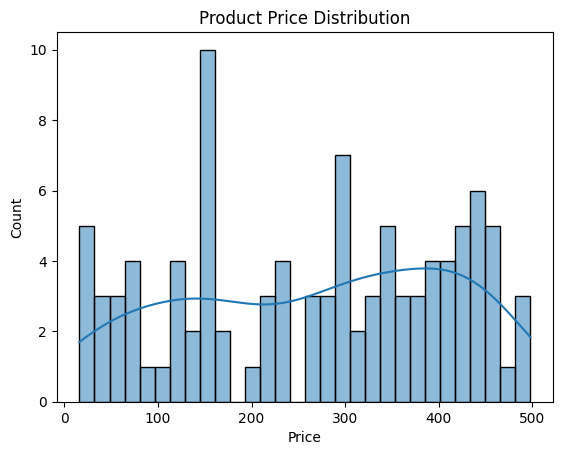

In [14]:
#Product Analysis - Price Distribution
sns.histplot(products_df['Price'], bins=30, kde=True)
plt.title('Product Price Distribution')
plt.show()


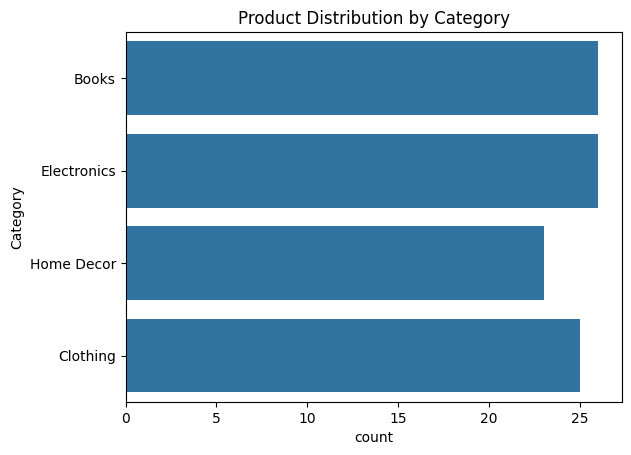

In [15]:
#Category Analysis
sns.countplot(y='Category', data=products_df)
plt.title('Product Distribution by Category')
plt.show()